In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')  # For better plots


In [3]:
url = "C:\Desktop\Titanic-Dataset.csv"
df = pd.read_csv(url)


In [4]:
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())


Dataset Shape: (891, 12)

Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)  # Too many missing values


C:\Users\sathv\AppData\Local\Temp\ipykernel_19104\160290036.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\sathv\AppData\Local\Temp\ipykernel_19104\160290036.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [6]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [9]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Example: Assuming df already exists and has 'Age' and 'Fare' columns
scaler = StandardScaler()

# Apply scaler and store back in the same columns
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


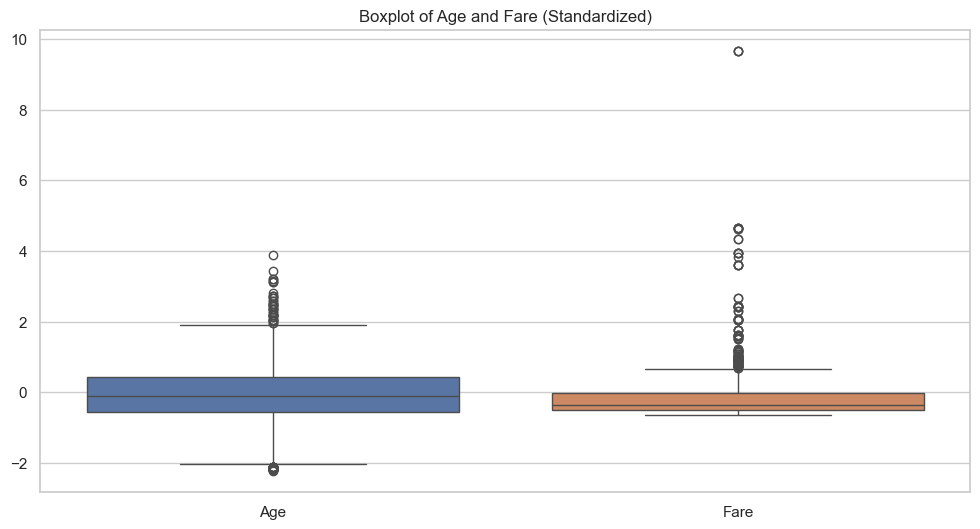

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplot of Age and Fare (Standardized)")
plt.show()


In [11]:
from scipy import stats

z_scores = np.abs(stats.zscore(df[['Age', 'Fare']]))
df = df[(z_scores < 3).all(axis=1)]


In [12]:
# View the cleaned and preprocessed data
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.565736,1,0,A/5 21171,-0.502445,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.663861,1,0,PC 17599,0.786845,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.258337,0,0,STON/O2. 3101282,-0.488854,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.433312,1,0,113803,0.420730,False,True
4,5,0,3,"Allen, Mr. William Henry",0,0.433312,0,0,373450,-0.486337,False,True


In [13]:
print("Final Shape:", df.shape)
print("Column Names:\n", df.columns)
print("Data Types:\n", df.dtypes)


Final Shape: (864, 12)
Column Names:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked_Q', 'Embarked_S'],
      dtype='object')
Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked_Q        bool
Embarked_S        bool
dtype: object


In [14]:
# Save cleaned and preprocessed data to a CSV file
df.to_csv("cleaned_titanic_data.csv", index=False)
print("Cleaned dataset saved as 'cleaned_titanic_data.csv'")


Cleaned dataset saved as 'cleaned_titanic_data.csv'
